# Pima Indians Diabetes dataset from Kaggle


### Data & Objective

In this Kernel I present a short analysis of the "Pima Indians Diabetes Database" provided by UCI Machine Learning in Kaggle, which is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. You can download it from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). All patients from this dataset are females at least 21 years old of Pima Indian heritage.

The objective is to predict the onset of diabetes based on diagnostic measures present in the dataset provided.

This Kernel is devided into 3 parts:

### 1. First Insights
  Get to know the data.
  - How many samples and features do we have?
  - What type of features do we have? 
  - How are they distributed?
  - Do we have null values?

### 2. Model creation & Validation
   - Before model creation first we need to separate into features and labels. Then check if the features need some pre-processing. For example for this dataset some Scaling could be useful.
   - Divide dataset into Train/Test. Test set will not be used for model creation keep it aside!! Train set will be used for training and validation using the k-fold cross validation technique.
   - I will use two classifiers: 
     - **Random Forest**
     - **Logistic Regression**  

### 3. Test final model with unseen data
 Once you have chosen the final model in step **2.** we will use that same model to predict the labels of the Test set we kept aside. This will allow to evaluate if the model we created is not overfit and can get also good results for unseen data.





In [62]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### 1. First Insights

In [63]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df.shape

(768, 9)

In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
Counter(df.Outcome)

Counter({0: 500, 1: 268})

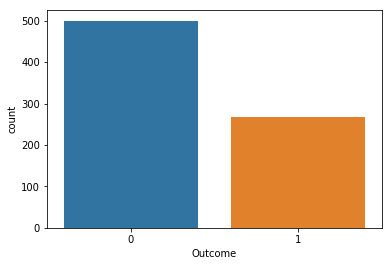

In [68]:
sns.countplot(x='Outcome',data=df)

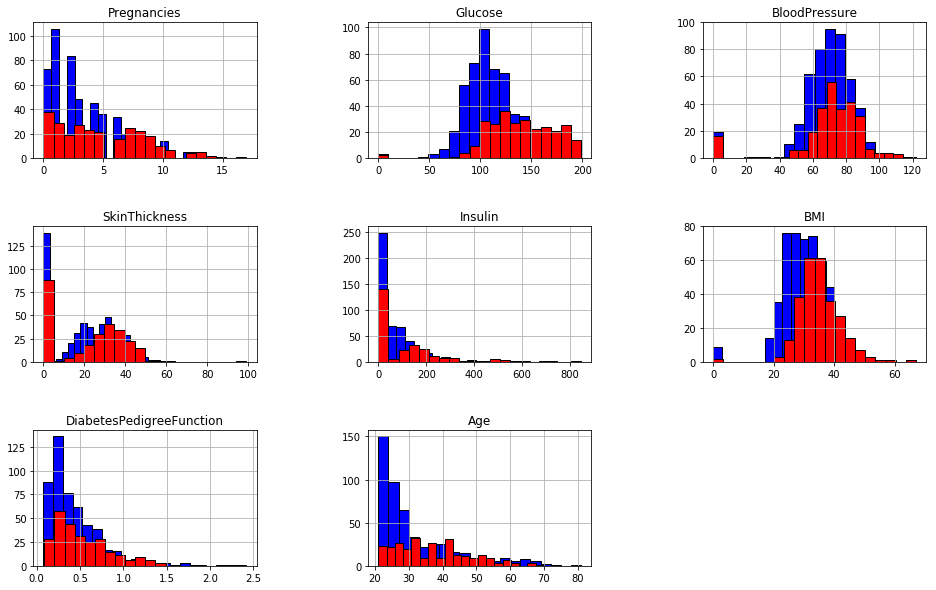

In [69]:
df_1 = df[df.Outcome == 1]
df_0 = df[df.Outcome == 0]
columns = df.columns[:-1]

plt.subplots(figsize=(16,10))
number_features = len(columns)
for i,j,  in zip(columns, range(number_features) ):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    df_0[i].hist(bins=20, color='b', edgecolor='black')
    df_1[i].hist(bins=20, color='r', edgecolor='black')
    plt.title(i)

### 2. Model creation

In [70]:
# get features and labels
X = df.iloc[:,:-1]
labels= df.iloc[:,-1]

In [71]:
# Standarize features
X = StandardScaler().fit_transform(X)

In [72]:
# Divide Data into train and test set  (test set will only be used in section 3.)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=0, stratify=labels)

In [73]:
# reset y_train index
y_train= y_train.reset_index(drop=True)

In [74]:
# Random Forest

RF_model = RandomForestClassifier(n_estimators=600, random_state=123456, class_weight="balanced")

acc=[]
sen=[]
spe=[]
kf = KFold(n_splits=5, random_state= 123)
kf.get_n_splits(X_train)

for train_index, test_index in kf.split(X_train):
    Features_train, Features_test = X_train[train_index], X_train[test_index]
    Labels_train, Labels_test = y_train[train_index], y_train[test_index]

    RF_model.fit(Features_train, Labels_train)
    cm = confusion_matrix(Labels_test, RF_model.predict(Features_test))
    tn, fp, fn, tp = confusion_matrix(Labels_test, RF_model.predict(Features_test)).ravel()
    sensitivity = tp/(tp+fn)
    specificity  = tn/(tn+fp)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    acc.append(accuracy)
    sen.append(sensitivity)
    spe.append(specificity)
    print(accuracy, sensitivity, specificity)

global_acc = np.mean(acc)
acc_std = np.std(acc)
global_sen = np.mean(sen)
sen_std = np.std(sen)
global_spe = np.mean(spe)
spe_std = np.std(spe)

print("_________________________________")
print('Accuracy:', global_acc, "+/-", acc_std)
print('Sensitivity:', global_sen, "+/-", sen_std)
print('Specificity:', global_spe, "+/-", spe_std)

0.6896551724137931 0.48484848484848486 0.7710843373493976
0.6956521739130435 0.46 0.8769230769230769
0.8 0.5952380952380952 0.9178082191780822
0.7217391304347827 0.5 0.84
0.7478260869565218 0.6388888888888888 0.7974683544303798
_________________________________
Accuracy: 0.7309745127436281 +/- 0.04022124124533731
Sensitivity: 0.5357950937950938 +/- 0.06896889582088347
Specificity: 0.8406567975761872 +/- 0.05286508318215896


In [75]:
# Logistic Regression

C_param_range = [0.001,0.01,0.1,1,10,100]

for i in C_param_range:
    LR_model = LogisticRegression(random_state=0, C=i, class_weight='balanced')
    print("\n C= ", i)
    
    acc=[]
    sen=[]
    spe=[]
    kf = KFold(n_splits=5, random_state= 123)
    kf.get_n_splits(X_train)

    for train_index, test_index in kf.split(X_train):
        Features_train, Features_test = X_train[train_index], X_train[test_index]
        Labels_train, Labels_test = y_train[train_index], y_train[test_index]

        LR_model.fit(Features_train, Labels_train)
        cm = confusion_matrix(Labels_test, LR_model.predict(Features_test))
        tn, fp, fn, tp = confusion_matrix(Labels_test, LR_model.predict(Features_test)).ravel()
        sensitivity = tp/(tp+fn)
        specificity  = tn/(tn+fp)
        accuracy = (tp+tn)/(tp+fp+tn+fn)
        acc.append(accuracy)
        sen.append(sensitivity)
        spe.append(specificity)
        
        print(accuracy, sensitivity, specificity)
      

    global_acc = np.mean(acc)
    acc_std = np.std(acc)
    global_sen = np.mean(sen)
    sen_std = np.std(sen)
    global_spe = np.mean(spe)
    spe_std = np.std(spe)

    print("_________________________________")
    print('Accuracy:', global_acc, "+/-", acc_std)
    print('Sensitivity:', global_sen, "+/-", sen_std)
    print('Specificity:', global_spe, "+/-", spe_std, "\n")


 C=  0.001
0.6982758620689655 0.7575757575757576 0.6746987951807228
0.6782608695652174 0.72 0.6461538461538462
0.7565217391304347 0.7142857142857143 0.7808219178082192
0.7304347826086957 0.75 0.72
0.7304347826086957 0.8055555555555556 0.6962025316455697
_________________________________
Accuracy: 0.7187856071964018 +/- 0.027416514126286214
Sensitivity: 0.7494834054834054 +/- 0.0326128432079812
Specificity: 0.7035754181576716 +/- 0.04565576488992617 


 C=  0.01
0.6982758620689655 0.7272727272727273 0.6867469879518072
0.6956521739130435 0.72 0.676923076923077
0.8 0.7380952380952381 0.8356164383561644
0.7304347826086957 0.7 0.7466666666666667
0.7391304347826086 0.8333333333333334 0.6962025316455697
_________________________________
Accuracy: 0.7326986506746627 +/- 0.03777124404168898
Sensitivity: 0.7437402597402598 +/- 0.04649037531678206
Specificity: 0.728431140308657 +/- 0.05873764535097927 


 C=  0.1
0.6982758620689655 0.696969696969697 0.6987951807228916
0.7304347826086957 0.74 0.7

### 2. Test final model with unseen data

In [79]:
# check how the RF model would perform on the test set
print(classification_report(y_test, RF_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.89      0.85       125
          1       0.75      0.61      0.67        67

avg / total       0.79      0.79      0.79       192



In [82]:
# Check results of chosen model (Logistic Regression) for unseen data, i.e. data that was not used for model creation
cm = confusion_matrix(y_test, LR_model.predict(X_test))
tn, fp, fn, tp = confusion_matrix(y_test, LR_model.predict(X_test)).ravel()
sensitivity = tp/(tp+fn)
specificity  = tn/(tn+fp)
accuracy = (tp+tn)/(tp+fp+tn+fn)

print(" Sensitivity:", sensitivity, "\n Specificity", specificity, "\n Accuracy:", accuracy)

 Sensitivity: 0.8059701492537313 
 Specificity 0.792 
 Accuracy: 0.796875


In [78]:
print(classification_report(y_test, LR_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.79      0.84       125
          1       0.68      0.81      0.73        67

avg / total       0.81      0.80      0.80       192

